In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Loading the dataset

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [9]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [10]:
df.quality.unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

 It is showing that Data is imbalanced.We need to balance the data.

In [12]:
df.isnull().sum()   # checking missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

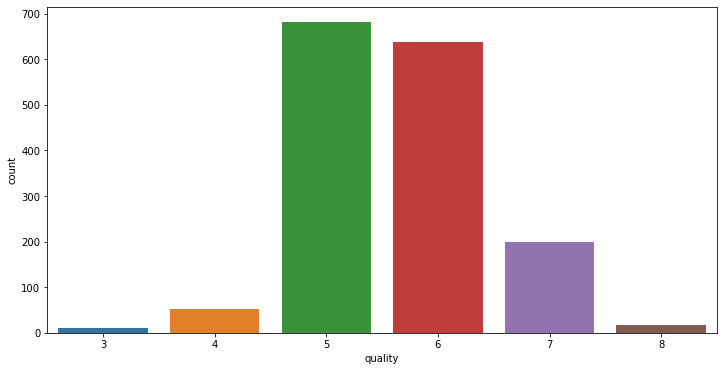

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df['quality'])
plt.show()

Quality equal to or greater than 5 has more count.

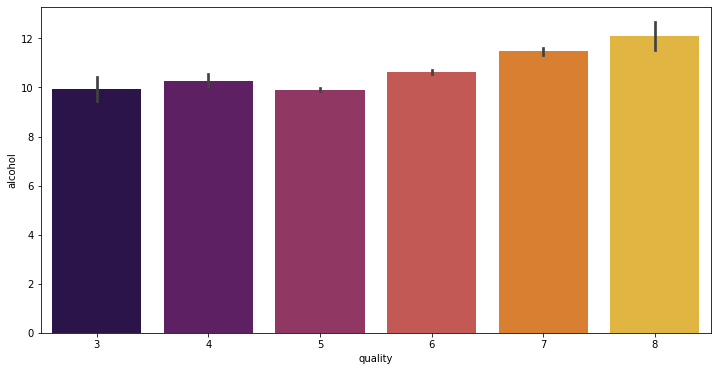

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='alcohol',data=df,palette='inferno')
plt.show()

With Increase in Alcohol content,Quality also increases.Quality 8 has highest alcohol content.

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

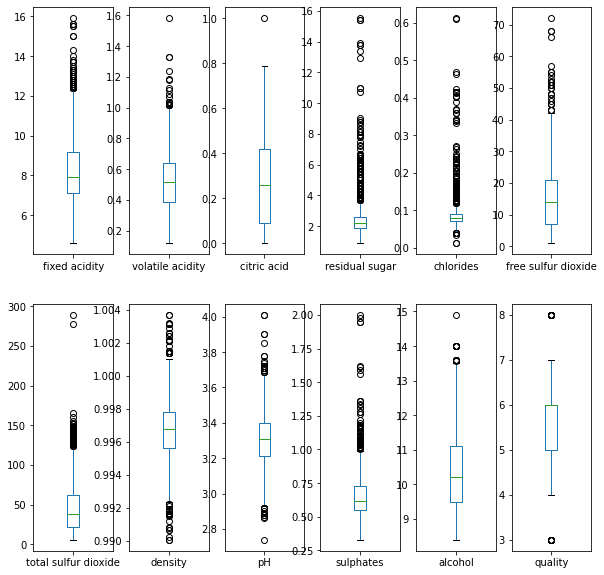

In [15]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

All the features have outliers presnt in them.Only citric acid has no outliers

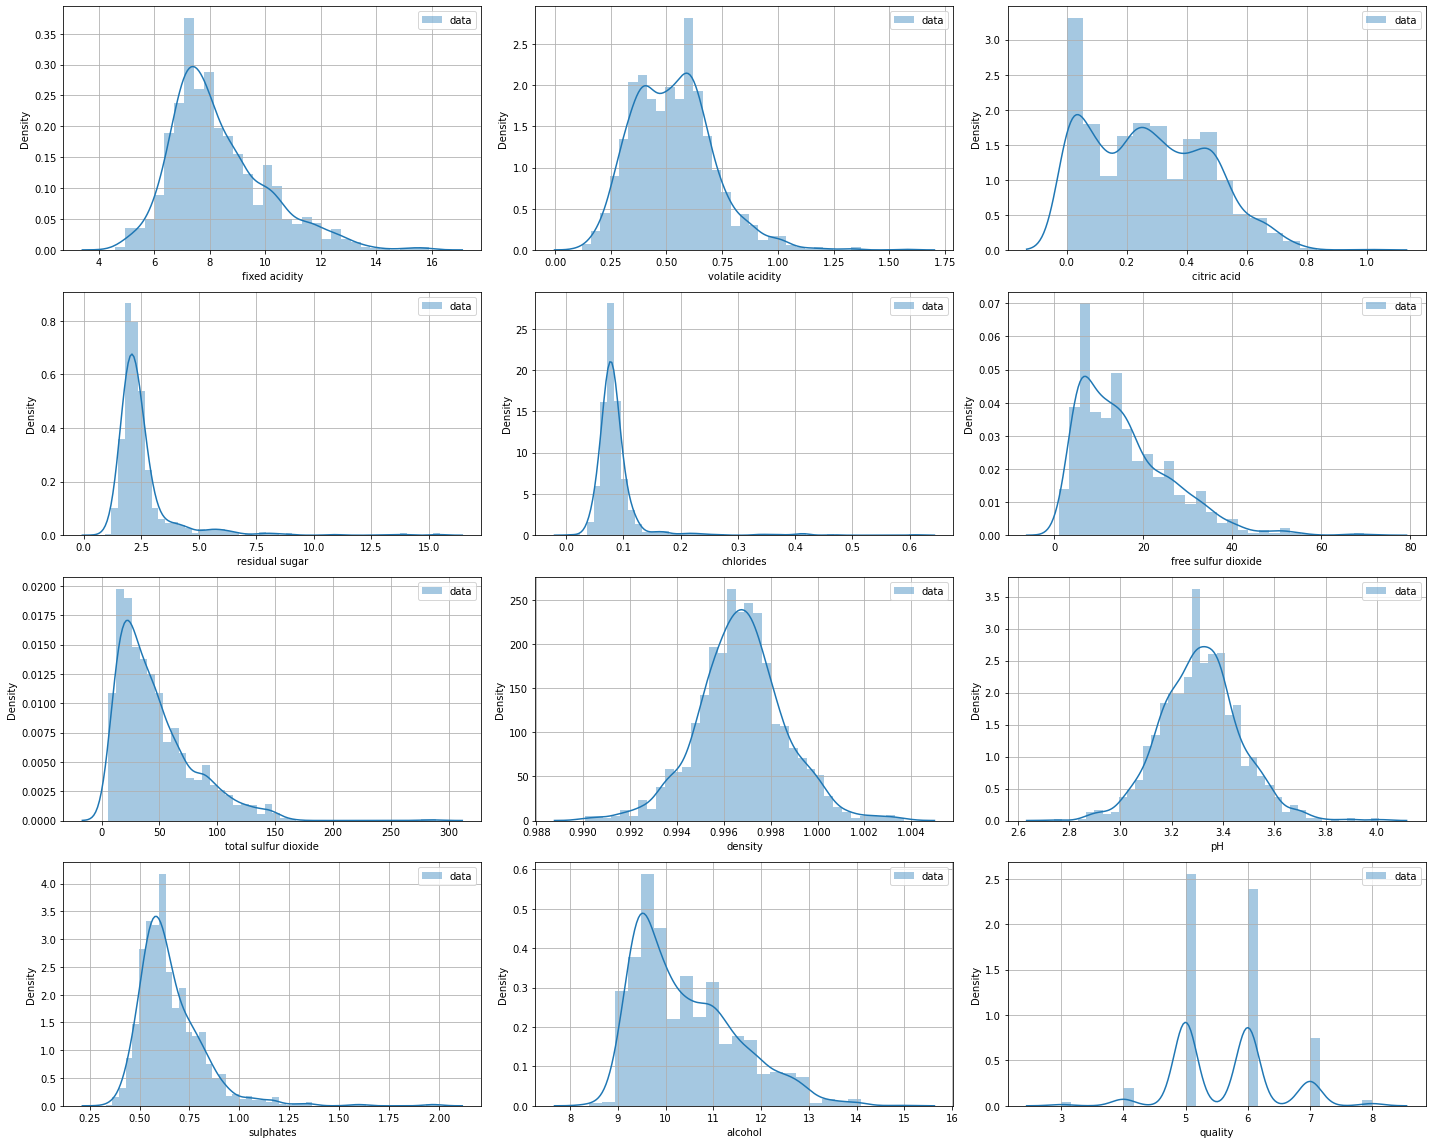

In [16]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col],kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

Only pH and density are normally distributed.All other features are positively skewed


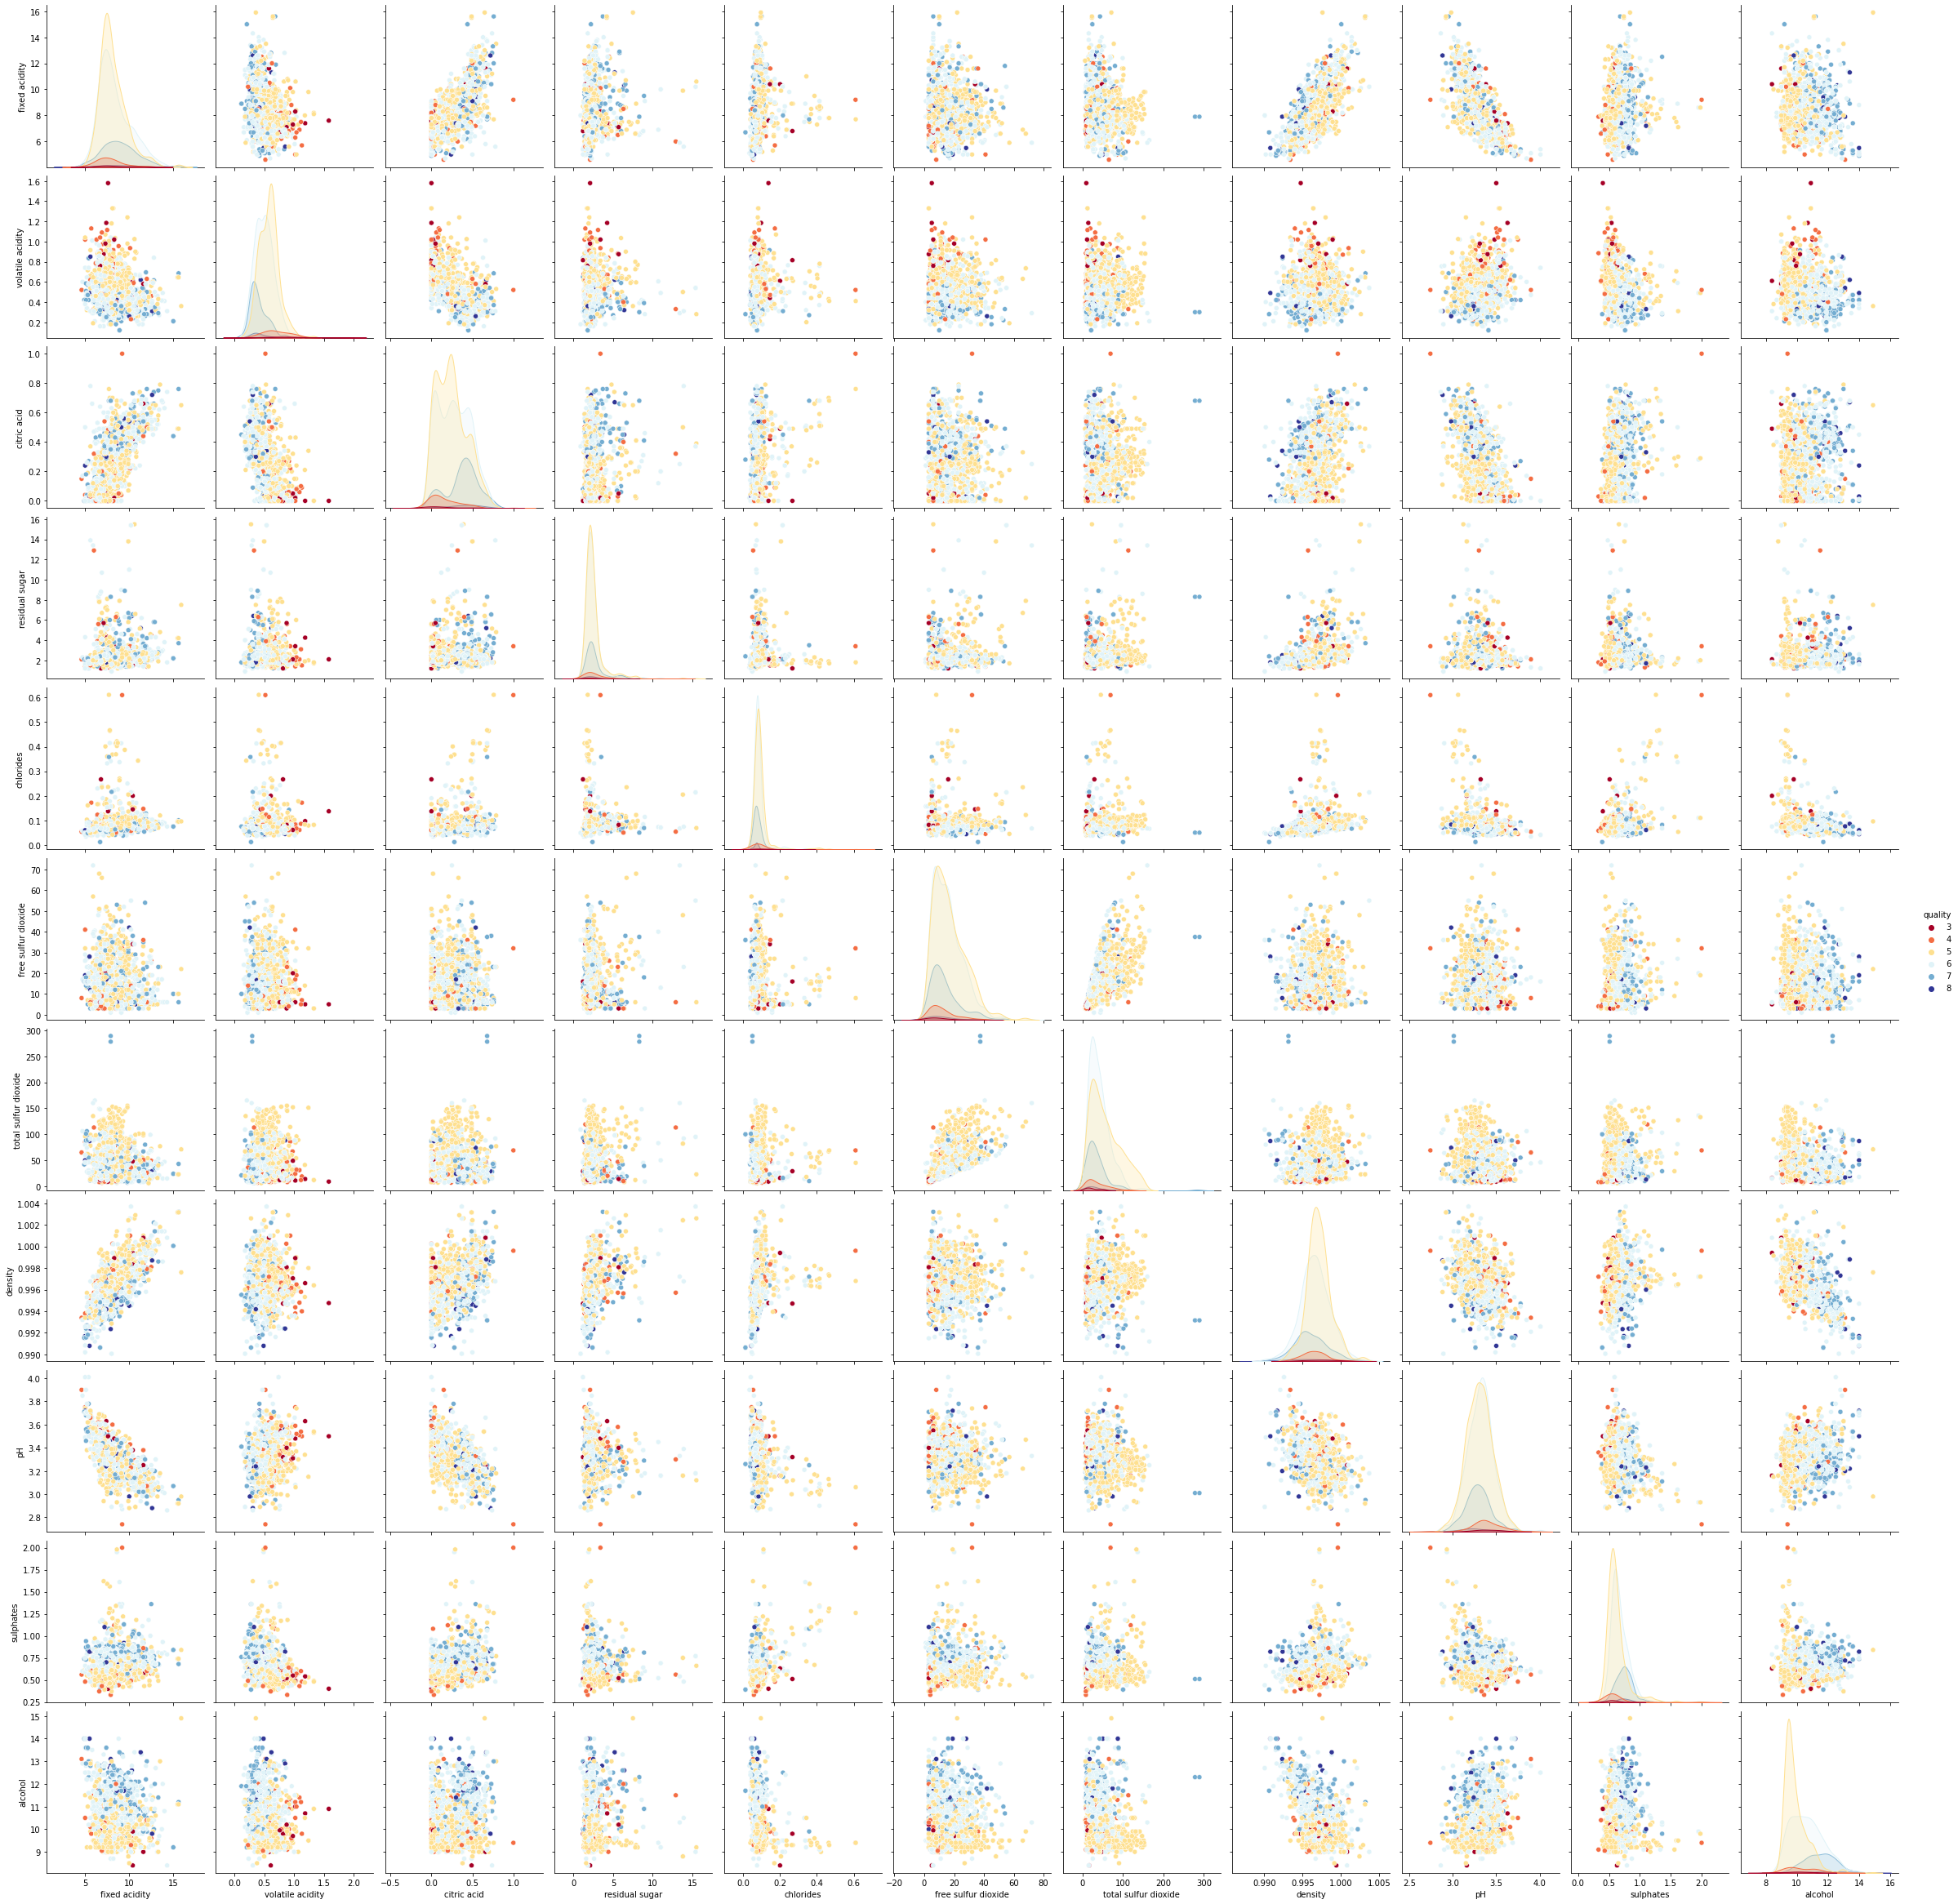

In [17]:
sns.pairplot(df,hue='quality',palette='RdYlBu',size=3)
plt.show()

In [18]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         

<AxesSubplot:>

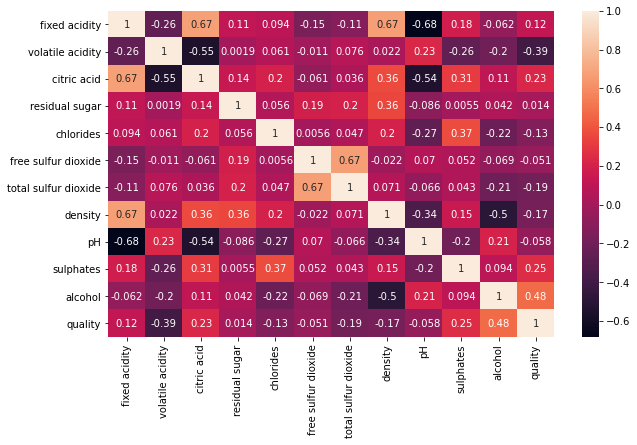

In [19]:

plt.figure(figsize=(10,6))                        #figure size
sns.heatmap(df.corr(),annot=True)

Alcohol and sulphates have good relation with quality.
Free sulfur dioxide and total sulfur dioxide are correlated that means they show same pattern.

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Removing outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [22]:
threshold=3
dfnew=df[(z<3).all(axis=1)]
dfnew.shape

(1451, 12)

In [23]:
dfnew.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

Quality having value 7 or more than 7 are classified as best quality

In [24]:
dfnew['best quality']=[1 if x>=7 else 0 for x in dfnew.quality]

In [25]:
dfnew.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
769,7.9,0.720,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.6,5,0
1242,9.0,0.400,0.41,2.0,0.058,15.0,40.0,0.99414,3.22,0.60,12.2,6,0
475,9.6,0.680,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5,0
1282,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6,0
465,10.0,0.290,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,5,0


In [26]:

x=dfnew.drop(['total sulfur dioxide','quality','best quality'],axis=1)
y=dfnew['best quality']

In [27]:
dfnew['best quality'].value_counts()

0    1250
1     201
Name: best quality, dtype: int64

In [28]:
x.shape

(1451, 10)

### Balancing the DataSet

In [29]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_res,y_res=smt.fit_resample(x,y)

In [30]:
y_res.value_counts()

0    1250
1    1250
Name: best quality, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res)

### SCALING

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_std = sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

### MODELS

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
lr=LogisticRegression()
lr.fit(x_train_std,y_train)
lr.score(x_train_std,y_train)
pred1=lr.predict(x_test_std)
print('Accuracy score of',lr,'is:')
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy score of LogisticRegression() is:
0.8144
[[251  60]
 [ 56 258]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       311
           1       0.81      0.82      0.82       314

    accuracy                           0.81       625
   macro avg       0.81      0.81      0.81       625
weighted avg       0.81      0.81      0.81       625



In [35]:
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train_std,y_train)
dtc.score(x_train_std,y_train)
pred2=dtc.predict(x_test_std)
print('Accuracy score of',dtc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy score of DecisionTreeClassifier(max_depth=5) is:
0.8224
[[229  82]
 [ 29 285]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.80       311
           1       0.78      0.91      0.84       314

    accuracy                           0.82       625
   macro avg       0.83      0.82      0.82       625
weighted avg       0.83      0.82      0.82       625



In [36]:
rf=RandomForestClassifier(random_state=33)
rf.fit(x_train_std,y_train)
rf.score(x_train_std,y_train)
pred3=rf.predict(x_test_std)
print('Accuracy score of',rf,'is:')
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

Accuracy score of RandomForestClassifier(random_state=33) is:
0.9328
[[284  27]
 [ 15 299]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       311
           1       0.92      0.95      0.93       314

    accuracy                           0.93       625
   macro avg       0.93      0.93      0.93       625
weighted avg       0.93      0.93      0.93       625



In [37]:
kn=KNeighborsClassifier()
kn.fit(x_train_std,y_train)
kn.score(x_train_std,y_train)
pred4=kn.predict(x_test_std)
print('Accuracy score of',kn,'is:')
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

Accuracy score of KNeighborsClassifier() is:
0.8704
[[234  77]
 [  4 310]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       311
           1       0.80      0.99      0.88       314

    accuracy                           0.87       625
   macro avg       0.89      0.87      0.87       625
weighted avg       0.89      0.87      0.87       625



### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
print(cross_val_score(lr,x,y,cv=10).mean())

0.8828483703353802


In [40]:
print(cross_val_score(dtc,x,y,cv=10).mean())

0.8731884742560228


In [41]:
print(cross_val_score(rf,x,y,cv=10).mean())

0.8814501653282946


In [42]:
print(cross_val_score(kn,x,y,cv=10).mean())

0.8456258856872934


### Hyperparameter tunning of model

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:

parameter={'max_depth':[3,5,7,9,10],
          'criterion':['gini','entropy'],
           'bootstrap':[True,False],
          'max_features':['auto','sqrt','log2']}

In [45]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [46]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [47]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt'}

In [48]:
final_mod=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=10,max_features='auto')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9376


In [49]:
p=np.array([6.5,0.39,0.23,8.3,0.051,28.0,0.99520,3.44,0.55,12.1])
p=p.reshape(1,-1)        #reshaped into 2D data,where -1:Many columns,1:number of rows
p.shape

(1, 10)

In [50]:
final_mod.predict(p)

array([0], dtype=int64)

In [51]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1368,8.0,0.770,0.32,2.1,0.079,16.0,74.0,0.99656,3.27,0.50,9.8,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1034,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6
218,7.5,0.490,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,5
1075,9.1,0.250,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,7


In [52]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [53]:
y_pred_prob=final_mod.predict_proba(x_test)[:,1]

In [54]:
y_pred_prob

array([2.80064882e-01, 6.31799019e-01, 9.07419370e-02, 7.71289724e-01,
       8.27282893e-01, 0.00000000e+00, 3.04758252e-01, 1.31874028e-01,
       9.60998481e-01, 5.73325739e-01, 8.00000000e-02, 1.95326087e-02,
       1.63939681e-01, 4.36492664e-01, 0.00000000e+00, 9.19610167e-01,
       9.90076364e-01, 9.55915005e-01, 1.85717328e-01, 7.11061522e-01,
       8.57810069e-01, 9.48060827e-01, 2.80064882e-01, 2.19688243e-02,
       9.83059578e-01, 2.50000000e-03, 2.35294118e-03, 8.95086655e-01,
       7.12571504e-01, 9.54451581e-01, 0.00000000e+00, 9.30148665e-01,
       9.21428917e-01, 6.70458278e-01, 9.61538462e-03, 8.87806748e-01,
       8.48516587e-01, 3.53216589e-02, 8.33678817e-01, 0.00000000e+00,
       0.00000000e+00, 7.16331191e-01, 0.00000000e+00, 6.89994958e-01,
       2.11415525e-02, 0.00000000e+00, 8.89188481e-01, 8.70530789e-01,
       7.95889917e-01, 0.00000000e+00, 9.54085772e-01, 2.40276740e-01,
       1.85717328e-01, 6.18685681e-01, 9.50032146e-01, 3.29411765e-02,
      

In [55]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

0.9375140803244107


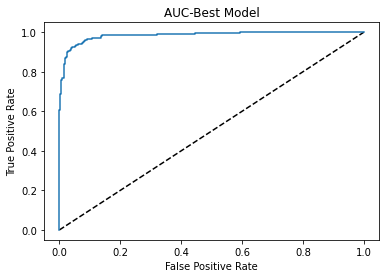

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Best Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-Best Model')
auc_score=roc_auc_score(y_test,final_mod.predict(x_test))
print(auc_score)

### Saving the Model

In [57]:
import joblib
joblib.dump(final_mod,'wine.obj')
mod_from_joblib=joblib.load('wine.obj')

In [58]:
mod_from_joblib=joblib.load('wine.obj')
mod_from_joblib.predict(p)

array([0], dtype=int64)